# Module 12 Assignment
Juju Ren

## 1) Introduction
The polarity dataset, which is comprised of 1000 positive and 1000 negative movie reviews. Each movie review is in the form of freeform text captured from web site postings. Applying sentiment analysis on the dataset. Classifying positive and negative feedback from clients / customers / the public.\
Sort the feelings according to the distinctive characteristics of the various entities. Identification of the entities and their components is the initial stage.

## 2) Data Preparation

### 2.1 Download the dataset
https://www.cs.cornell.edu/people/pabo/movie-review-data/

The compressed file contains two directories: neg which contains 1000 negative movie reviews; and pos which contains 1000 positive movie reviews

### 2.2 Load the dataset to Github Respository
https://github.com/JuJu-Ren/AIM-5001/tree/main/M12/review_polarity/neg

https://github.com/JuJu-Ren/AIM-5001/tree/main/M12/review_polarity/pos

### 2.3 Build a dataframe of movie reviews

In [1]:
# import nltk library
import nltk
# download all of the optional NLTK components that do not get installed by default
nltk.download('all', halt_on_error=False)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package pl196x is already up-to-date!
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    |   Package porter_test is already up-to-date!
[nltk_data]    | Downloading package ppattach to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ppattach is already up-to-date!
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\Jiuge\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downl

True

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt


#### get the file path from the directory

In [3]:
url = 'https://github.com/JuJu-Ren/AIM-5001/tree/main/M12/review_polarity/neg'
r = requests.get(url)
c = r.content
soup = BeautifulSoup(c,"html.parser")
soup = soup.find_all("a",{"class":"js-navigation-open Link--primary"})
path_neg =[]
title_neg=[]
root = 'https://raw.githubusercontent.com/JuJu-Ren/AIM-5001/main/M12/review_polarity/neg/'
for i in soup:
    title_neg.append(i['title'])
    path_neg.append(root+i['title'])
len(path_neg)

1000

In [4]:
url = 'https://github.com/JuJu-Ren/AIM-5001/tree/main/M12/review_polarity/pos'
r = requests.get(url)
c = r.content
soup = BeautifulSoup(c,"html.parser")
soup = soup.find_all("a",{"class":"js-navigation-open Link--primary"})
path_pos =[]
title_pos =[]
root = 'https://raw.githubusercontent.com/JuJu-Ren/AIM-5001/main/M12/review_polarity/pos/'
for i in soup:
    title_pos.append(i['title'])
    path_pos.append(root+i['title'])
len(path_pos)

1000

 #### Removing Stopwords from a Text

In [5]:
import nltk
import string
# load the stopwords module
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import urllib

In [6]:
neg = []
for i in range(len(path_neg)):
    path = path_neg[i]
    en_stops = stopwords.words('english')
    response = urllib.request.urlopen(path)
    Text = response.read().decode("utf-8")
    Text = " ".join(Text.split("\n")[:-1])
    Text = RegexpTokenizer(r'\w+').tokenize(Text)
    clean_neg = []
    for word in Text:
        if word not in en_stops and word not in string.punctuation:
            if re.findall("[A-Za-z]+", word) != []:
                clean_neg.append(word)
    neg.append(clean_neg)

In [7]:
pos = []
for i in range(len(path_pos)):
    path = path_pos[i]
    en_stops = stopwords.words('english')
    response = urllib.request.urlopen(path)
    Text = response.read().decode("utf-8")
    Text = " ".join(Text.split("\n")[:-1])
    Text = RegexpTokenizer(r'\w+').tokenize(Text)
    clean_pos = []
    for word in Text:
        if word not in en_stops and word not in string.punctuation:
            if re.findall("[A-Za-z]+", word) != []:
                clean_pos.append(word)
    pos.append(clean_pos)

In [8]:
print(len(neg),len(pos))

1000 1000


#### check the data distribution

In [9]:
len(pos[0])

394

In [10]:
# get the frequency distribution of the words in negative reviews
all_neg_words = []
for review in neg:
    for word in review:
         all_neg_words.append(word)
all_neg_words            

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get',
 'accident',
 'one',
 'guys',
 'dies',
 'girlfriend',
 'continues',
 'see',
 'life',
 'nightmares',
 'deal',
 'watch',
 'movie',
 'sorta',
 'find',
 'critique',
 'mind',
 'fuck',
 'movie',
 'teen',
 'generation',
 'touches',
 'cool',
 'idea',
 'presents',
 'bad',
 'package',
 'makes',
 'review',
 'even',
 'harder',
 'one',
 'write',
 'since',
 'generally',
 'applaud',
 'films',
 'attempt',
 'break',
 'mold',
 'mess',
 'head',
 'lost',
 'highway',
 'memento',
 'good',
 'bad',
 'ways',
 'making',
 'types',
 'films',
 'folks',
 'snag',
 'one',
 'correctly',
 'seem',
 'taken',
 'pretty',
 'neat',
 'concept',
 'executed',
 'terribly',
 'problems',
 'movie',
 'well',
 'main',
 'problem',
 'simply',
 'jumbled',
 'starts',
 'normal',
 'downshifts',
 'fantasy',
 'world',
 'audience',
 'member',
 'idea',
 'going',
 'dreams',
 'characters',
 'coming',
 'back',
 'dead',
 'others',
 'look',
 'like',
 'dead

In [11]:
# how many non-stopwords are found within the 1000 negative reviews?
len(all_neg_words)

330613

In [12]:
# how many distinct non-stopwords are found across the 1000 negative reviews?
len(nltk.FreqDist(all_neg_words))

28021

In [13]:
# get the frequency distribution of the words in positive reviews
all_pos_words = []
for review in pos:
    for word in review:
         all_pos_words.append(word)
all_pos_words

['films',
 'adapted',
 'comic',
 'books',
 'plenty',
 'success',
 'whether',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'geared',
 'toward',
 'kids',
 'casper',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'never',
 'really',
 'comic',
 'book',
 'like',
 'hell',
 'starters',
 'created',
 'alan',
 'moore',
 'eddie',
 'campbell',
 'brought',
 'medium',
 'whole',
 'new',
 'level',
 'mid',
 '80s',
 'part',
 'series',
 'called',
 'watchmen',
 'say',
 'moore',
 'campbell',
 'thoroughly',
 'researched',
 'subject',
 'jack',
 'ripper',
 'would',
 'like',
 'saying',
 'michael',
 'jackson',
 'starting',
 'look',
 'little',
 'odd',
 'book',
 'graphic',
 'novel',
 'pages',
 'long',
 'includes',
 'nearly',
 'consist',
 'nothing',
 'footnotes',
 'words',
 'dismiss',
 'film',
 'source',
 'get',
 'past',
 'whole',
 'comic',
 'book',
 'thing',
 'might',
 'find',
 'another',
 'stumbling',
 'block',
 'hell',
 'directors',
 'albert',
 'allen',
 'hughes',
 'getting',
 'hughes',
 'brothers',
 'direct

In [14]:
# how many non-stopwords are found within the 1000 positive reviews?
len(all_pos_words)

372286

In [15]:
# how many distinct non-stopwords are found across the 1000 positive reviews?
len(nltk.FreqDist(all_pos_words))

29940

#### Build the dataframe

In [16]:
title = []

for review in pos:
    # what is the frequency distribution of the distinct words?
    rfreq = nltk.FreqDist(review)
    rfreq['label'] = 'pos' 
    title.append(rfreq)

for review in neg:
    # what is the frequency distribution of the distinct words?
    rfreq = nltk.FreqDist(review)
    rfreq['label'] = 'neg'
    title.append(rfreq)

len(title)

2000

In [17]:
title = []
category = [pos,neg]
for item in category:
    for i in range(1000):
        # what is the frequency distribution of the distinct words?
        review = nltk.FreqDist(item[i])
        if item == pos:
            review['label'] = 'pos'
        if item == neg:
            review['label'] = 'neg'
        title.append(review)
len(title)

2000

In [18]:
df = pd.DataFrame(title)
df.fillna(0, inplace = True)

In [19]:
df.head()

,films,adapted,comic,books,plenty,success,whether,superheroes,batman,superman,...,_roxbury_,pelvic,butabis,fortenberry,_21_jump_street_,obeys,rift,stonily,_jerry_maguire_,_have_
0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.4 Convert the cumulative frequency count data content
from dataframe into a Numpy array

In [20]:
df_new = df.drop('label', axis = 1)
df_new

,films,adapted,comic,books,plenty,success,whether,superheroes,batman,superman,...,_roxbury_,pelvic,butabis,fortenberry,_21_jump_street_,obeys,rift,stonily,_jerry_maguire_,_have_
0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data = df_new.to_numpy()

In [22]:
data.shape

(2000, 39189)

## 3) Calculate Matrix Sparsity
### 3.1 Calculate the sparsity of the term-document matrix
What percentage of the entries in your term-document matrix contain zeroes?


In [23]:
nonzero = np.count_nonzero(data)
total = data.shape[0] * data.shape[1]
sparsity = (total - nonzero)/total
print('percentage of the entries in your term-document matrix contain zeroes')
print('Sparsity =', sparsity*100, '%')

percentage of the entries in your term-document matrix contain zeroes
Sparsity = 99.31982826813646 %


## 4) Frequency Distribution Plots
### 4.1  plot the frequency distribution for the 30 words which occur most frequently in the positive reviews. What insights can you derive from the plot?

Find all the data with label == 'pos', which are data contains with positive reviews

In [24]:
df_pos = pd.DataFrame(df[df['label'] == 'pos'])
df_pos.drop('label', axis = 1, inplace = True)

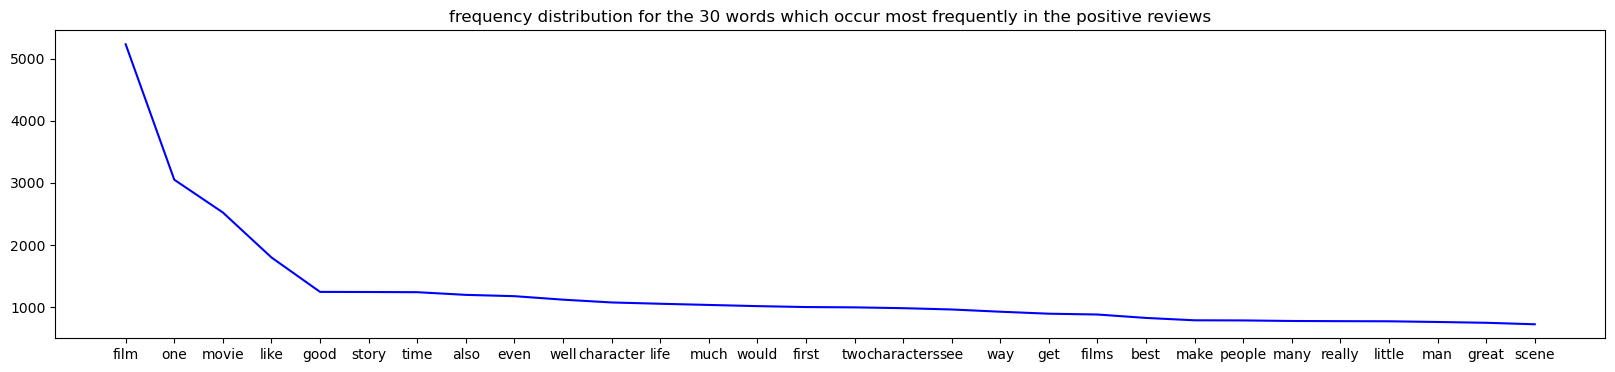

film          5230.0
one           3052.0
movie         2525.0
like          1802.0
good          1248.0
story         1246.0
time          1243.0
also          1200.0
even          1179.0
well          1123.0
character     1078.0
life          1057.0
much          1038.0
would         1019.0
first         1004.0
two            999.0
characters     986.0
see            965.0
way            929.0
get            897.0
films          884.0
best           829.0
make           791.0
people         789.0
many           780.0
really         777.0
little         775.0
man            764.0
great          751.0
scene          727.0
dtype: float64

In [25]:
# first 30 words 
x1=df_pos.sum().sort_values(ascending=False)[:30]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,4))
plt.plot(x1, color='b')
plt.title('frequency distribution for the 30 words which occur most frequently in the positive reviews')
plt.show()
x1

From the chart above we can see that first three words "film","one", and "movie" has the most frequency, and they are segnificantly having higher frequency than other words.
We can see some very positive words ranking in top 30s, for example: "like", "good", "well","much","best", and"great"

### 4.2 plot the frequency distribution for the 30 words which occur most frequently in the negative reviews. What insights can you derive from the plot?

Find all the data with label == 'neg', which are data contains with negative reviews

In [26]:
df_neg = pd.DataFrame(df[df['label'] == 'neg'])
df_neg.drop('label', axis = 1, inplace = True)

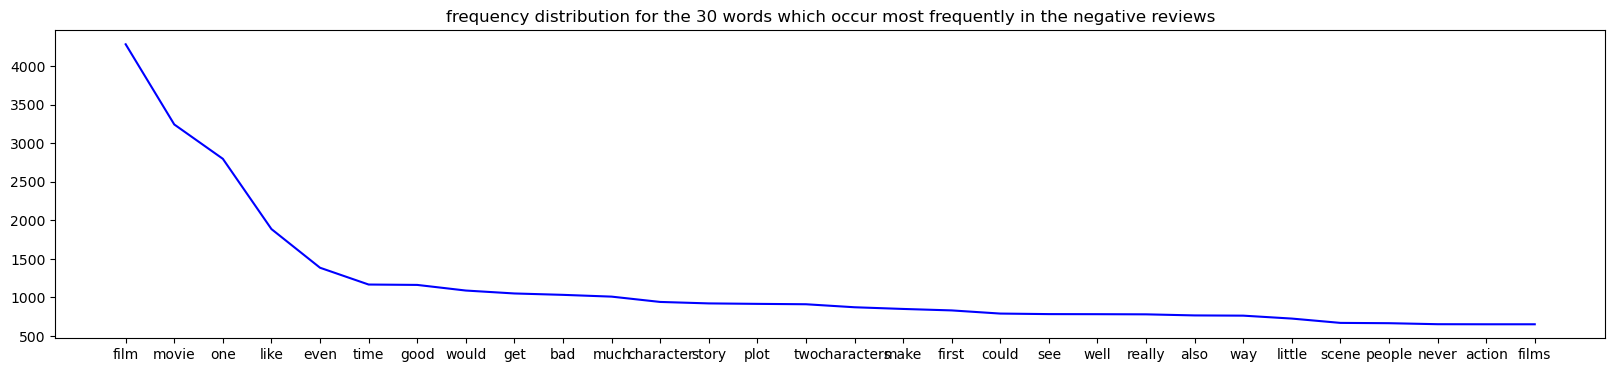

film          4287.0
movie         3246.0
one           2800.0
like          1888.0
even          1386.0
time          1168.0
good          1163.0
would         1090.0
get           1052.0
bad           1034.0
much          1011.0
character      942.0
story          923.0
plot           917.0
two            912.0
characters     873.0
make           851.0
first          832.0
could          791.0
see            784.0
well           783.0
really         781.0
also           767.0
way            764.0
little         726.0
scene          670.0
people         666.0
never          653.0
action         652.0
films          652.0
dtype: float64

In [27]:
# first 30 words 
x2=df_neg.sum().sort_values(ascending=False)[:30]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,4))
plt.plot(x2, color='b')
plt.title('frequency distribution for the 30 words which occur most frequently in the negative reviews')
plt.show()
x2

From the chart above we can see that first three words "film","movie", and "one" has the most frequency, and they are segnificantly having higher frequency than other words. We can see some negative words ranking in top 30s, for example: "bad","never". However seems like the top 30 negative word didn't catch that much negative words comparatively. 

## 5) Sentiment Analysis Model Prepararion
### 5.1 Data subset
Randomly sample 75% of the vectors contained within
the term-document matrix for use as a model training data subset while leaving the remaining 25% of
the vectors for the model testing data subset. How you choose to split the data is up to you as the data
science / Python practitioner to decide. Be sure to display samples of your training and testing subsets
to a reader of your work. 

In [28]:
# build a model training data subset with 75% of the data
train_data = df.sample(frac = 0.75)
# set test data subset with 25% of the rest data
test_data = df.drop(train_data.index)

#### How many documents are contained within your training subset?

In [29]:
print('There are', len(train_data),'documents contained in the training subset')

There are 1500 documents contained in the training subset


#### How many documents are contained in your testing subset?

In [30]:
print('There are', len(test_data),'documents contained in the testing subset')

There are 500 documents contained in the testing subset


#### How many positive and negative reviews are contained within each subset? 

In [31]:
train_pos = len(train_data[(train_data['label'] == 'pos')])
train_neg = len(train_data[(train_data['label'] == 'neg')])
print('There are', train_pos,'positive reviews and',train_neg,
      'negative reviews in the training subset')

There are 747 positive reviews and 753 negative reviews in the training subset


In [32]:
test_pos = len(test_data[(test_data['label'] == 'pos')])
test_neg = len(test_data[(test_data['label'] == 'neg')])
print('There are', test_pos,'positive reviews and',test_neg,
      'negative reviews in the testing subset')

There are 253 positive reviews and 247 negative reviews in the testing subset


#### Does the mix of positive and negative reviews appear to be relatively balanced within each of the subsets?
Be sure to provide a suitable explanatory narrative in
the form of formatted Markdown cells.

In [33]:
x_pos = [train_pos,test_pos]
x_neg = [train_neg,test_neg]

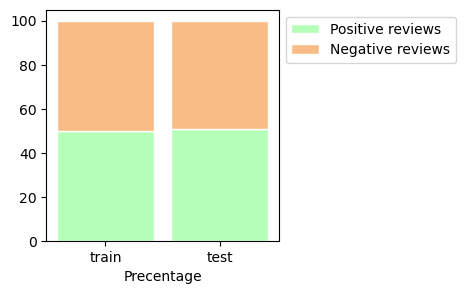

In [34]:
r = [0,1]
raw_data = {'greenBars': x_pos, 'orangeBars': x_neg}
df1 = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j for i,j in zip(df1['greenBars'], df1['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df1['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df1['orangeBars'], totals)]
barWidth = 0.85
names = ('train','test')
fig= plt.subplots(nrows=1, ncols=1, figsize=(3,3))
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="Positive reviews")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Negative reviews")
# Create blue Bars
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Precentage")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

We separate the data into train and test. As we can see fromt he chart above, the distribution of the words appear in train and test subset are relatively same and close to 1:1 ratio